In [144]:
import re
import numpy as np
from os import path
import pandas as pd
import seaborn as sns
import wordcloud as wc
import matplotlib.pyplot as plt
le = LabelEncoder()
%matplotlib inline

In [56]:
animal_shelter = pd.read_csv('csv_files/train.csv')

In [59]:
animal_shelter['Adopted'] = ''

for rowcount in animal_shelter.index:
    if animal_shelter.OutcomeType[rowcount] == 'Return_to_owner' or animal_shelter.OutcomeType[rowcount] == 'Adoption':
        animal_shelter['Adopted'][rowcount] = 'Y'
    else:
        animal_shelter['Adopted'][rowcount] = 'N'

In [60]:
y_n_dummies = pd.get_dummies(animal_shelter.Adopted)

In [61]:
animal_shelter = animal_shelter.join(y_n_dummies)
animal_shelter = animal_shelter.drop(labels=['Adopted'], axis=1)

In [62]:
dogs = animal_shelter[animal_shelter.AnimalType == 'Dog']
dogs = dogs.dropna(subset=['Name', 'OutcomeType'])
cats = animal_shelter[animal_shelter.AnimalType == 'Cat']
cats = cats.dropna(subset=['Name', 'OutcomeType'])

dogs_adopted_based_on_name = pd.pivot_table(dogs, index='Name', values=['Y', 'N'], aggfunc='sum')
dogs_adopted_based_on_name['Total'] = dogs_adopted_based_on_name.Y + dogs_adopted_based_on_name.N
dogs_adopted_based_on_name['Y_percent'] = dogs_adopted_based_on_name.Y/dogs_adopted_based_on_name.Total
dogs_adopted_based_on_name['N_percent'] = dogs_adopted_based_on_name.N/dogs_adopted_based_on_name.Total
dogs_adopted_based_on_name = dogs_adopted_based_on_name.drop(labels=['Y', 'N', 'Total'], axis=1)
plt.figure(figsize=(20,500))
sns.heatmap(dogs_adopted_based_on_name)

cats_adopted_based_on_name = pd.pivot_table(cats, index='Name', values=['Y', 'N'], aggfunc='sum')
cats_adopted_based_on_name['Total'] = cats_adopted_based_on_name.Y + cats_adopted_based_on_name.N
cats_adopted_based_on_name['Ypercent'] = cats_adopted_based_on_name.Y/cats_adopted_based_on_name.Total
cats_adopted_based_on_name['Npercent'] = cats_adopted_based_on_name.N/cats_adopted_based_on_name.Total
cats_adopted_based_on_name = cats_adopted_based_on_name.drop(labels=['Y', 'N', 'Total'], axis=1)
plt.figure(figsize=(20,500))
sns.heatmap(cats_adopted_based_on_name)

In [33]:
animal_shelter = animal_shelter.dropna(subset=['Name', 'OutcomeType'])

In [34]:
animal_shelter_names = pd.DataFrame(animal_shelter.Name.value_counts())

In [35]:
dog_names = pd.DataFrame(dogs.Name.value_counts())

In [36]:
cat_names = pd.DataFrame(cats.Name.value_counts())

In [42]:
animal_shelter_names = animal_shelter_names[animal_shelter_names.Name >= 12]

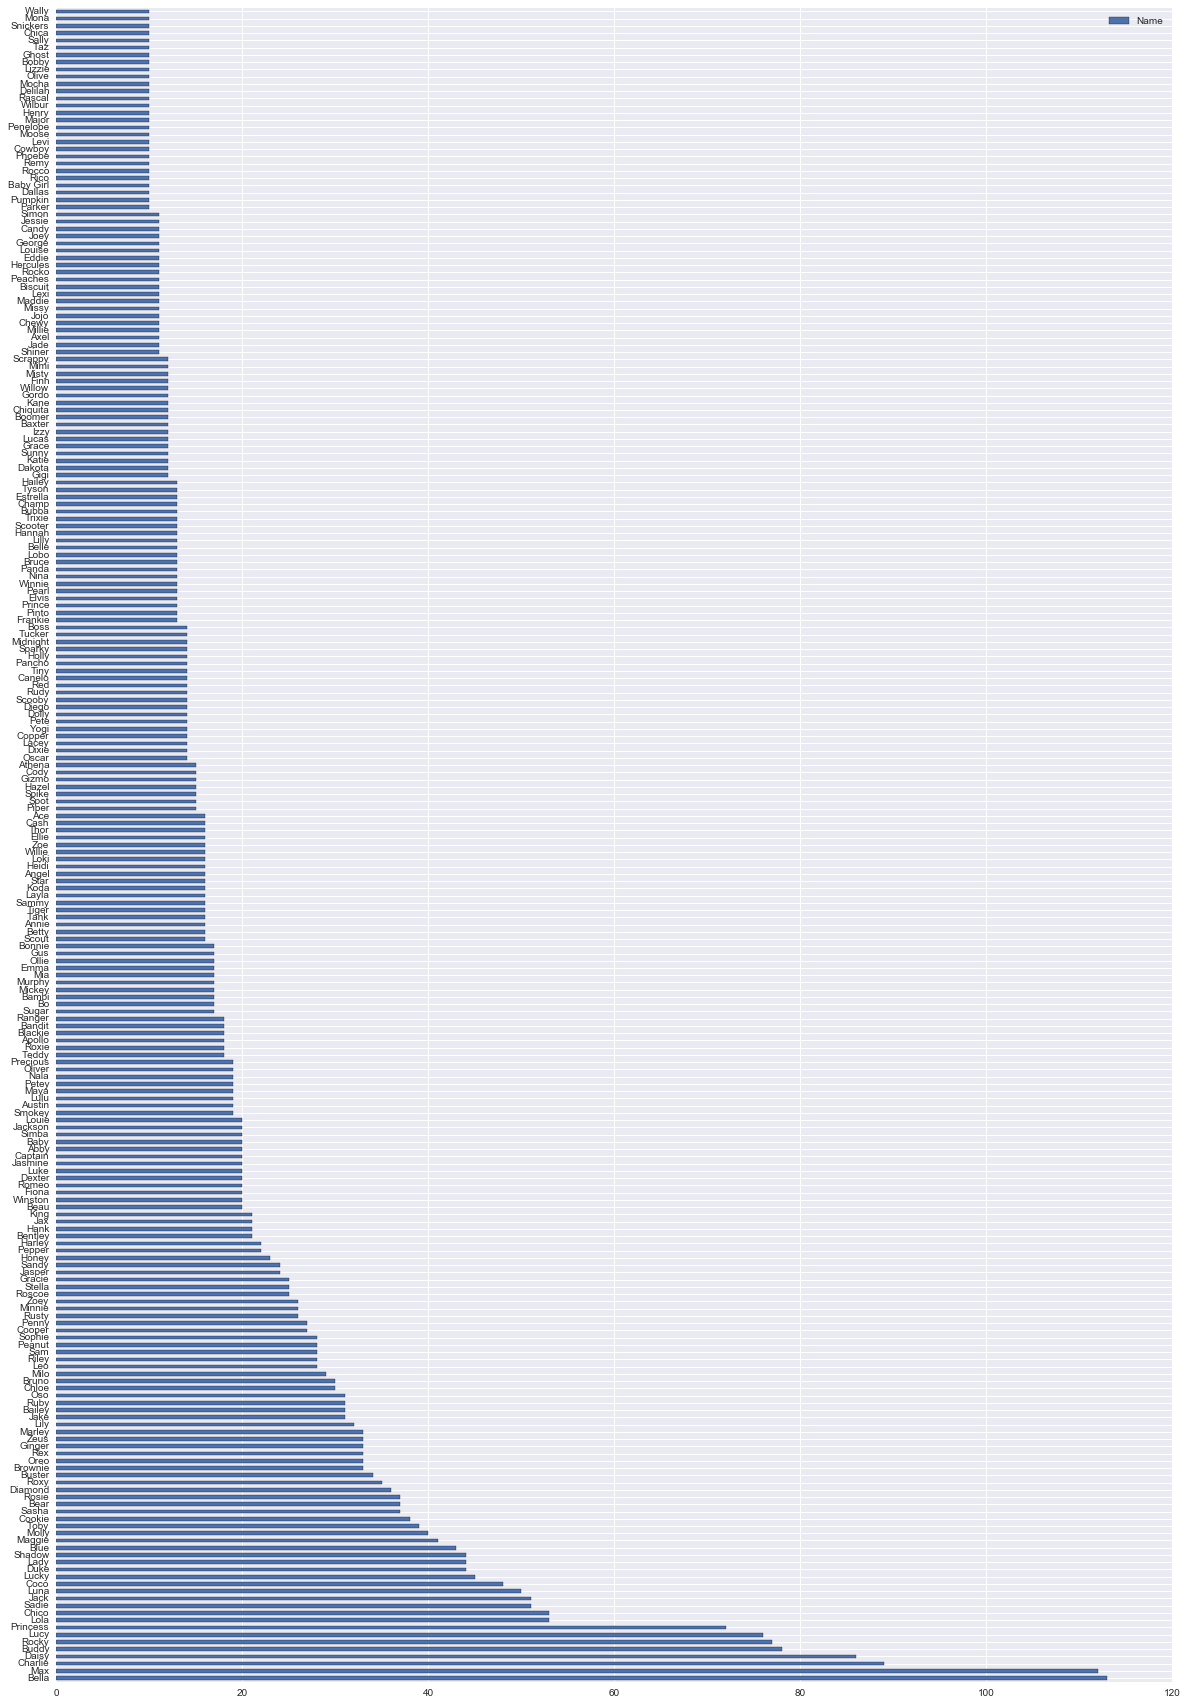

In [77]:
dog_names[dog_names.Name >= 10].plot(kind='barh', figsize=(20, 30))

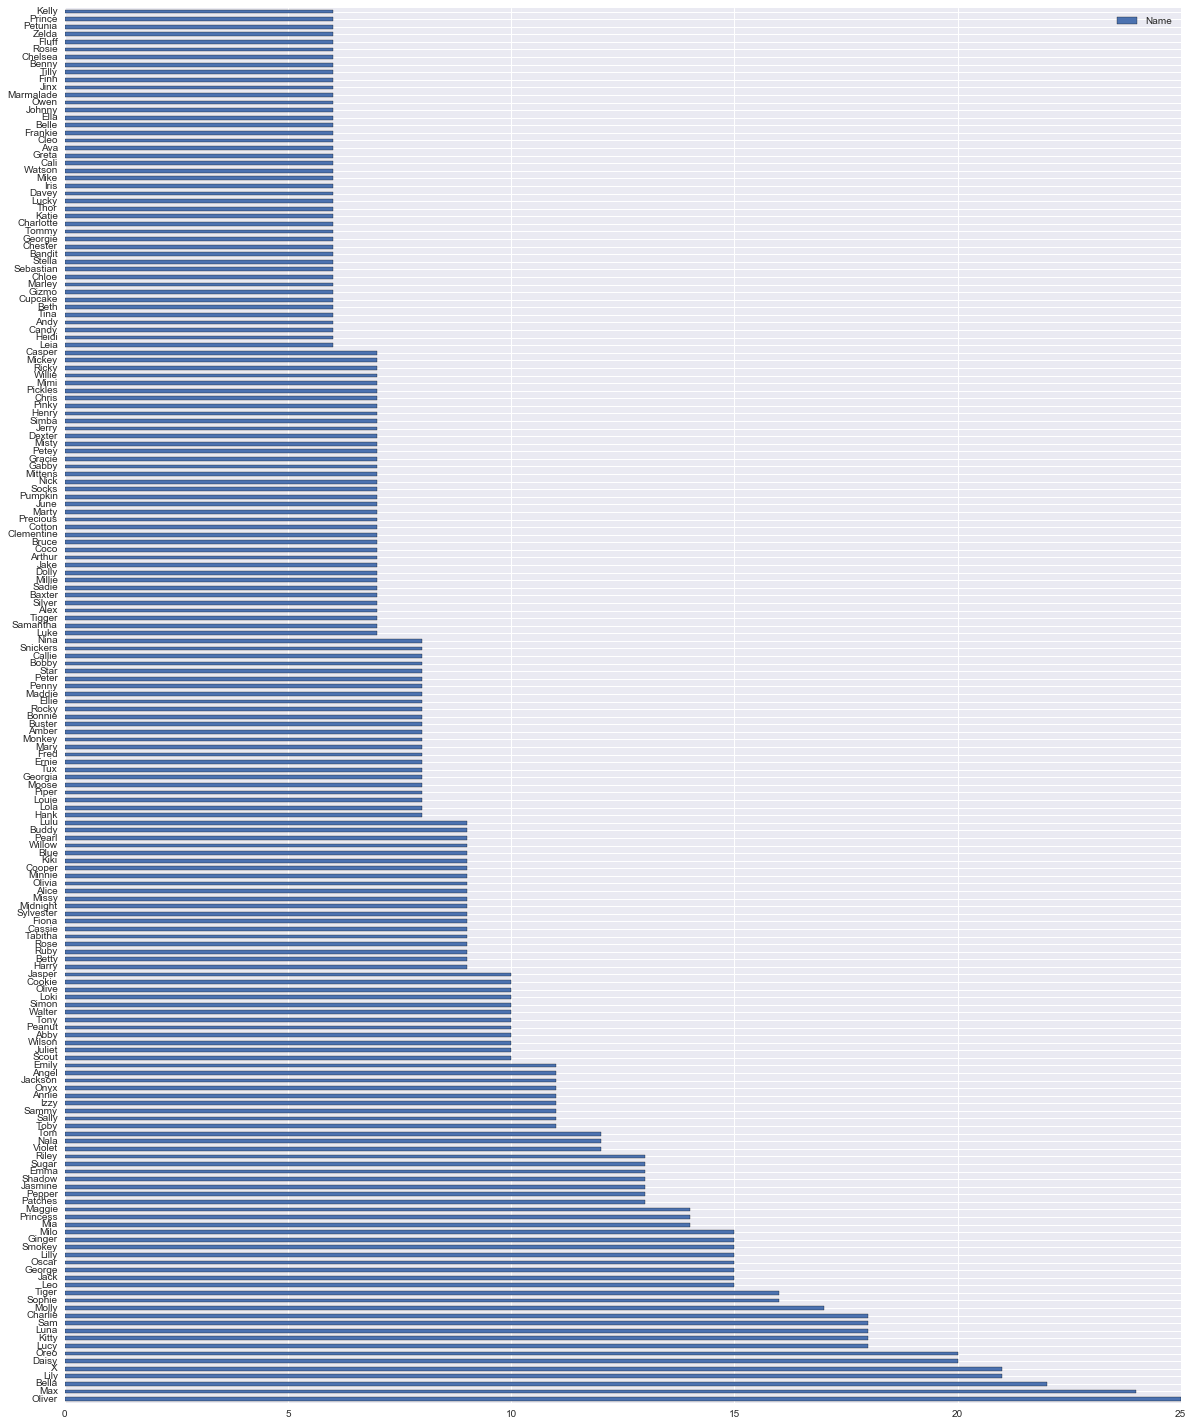

In [75]:
cat_names[cat_names.Name > 5].plot(kind='barh', figsize=(20,25))

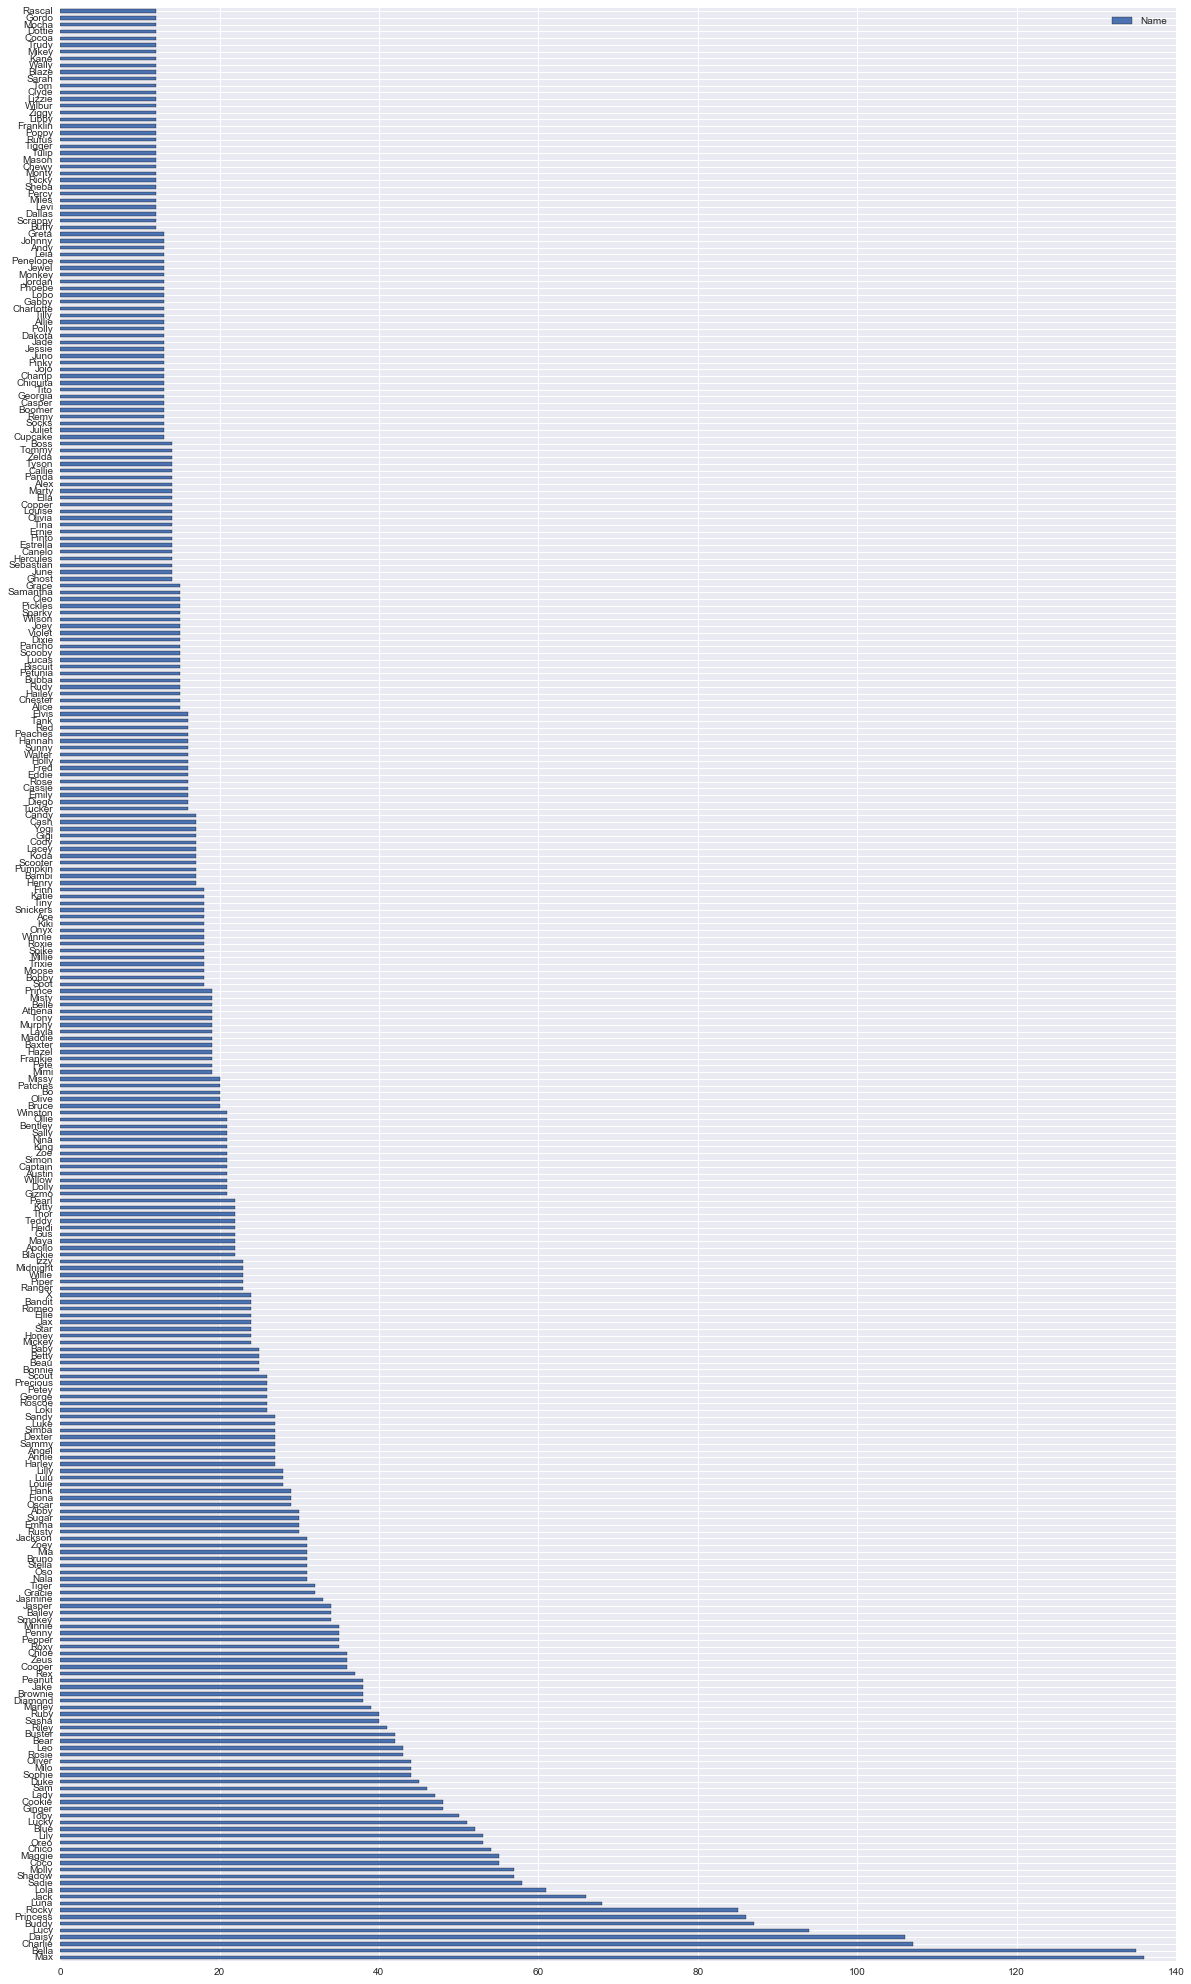

In [82]:
animal_shelter_names.plot(kind='barh', figsize=(20, 35))

In [123]:
name_str = ''.join(animal_shelter.dropna(subset=['Name']).Name)
name_str = re.sub(r'(?<=[a-z])(?=[A-Z])', ', ', name_str)

In [166]:
word_cloud = wc.WordCloud(background_color="black", max_words=2000)
word_cloud.generate(name_str)
word_cloud.to_file(path.join("animal_names.png"))

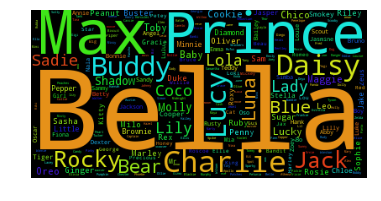

In [167]:
plt.imshow(word_cloud)
plt.axis("off")
plt.figure()
plt.show()

In [168]:
cat_names_str = ''.join(cats.dropna(subset=['Name']).Name)
cat_names_str = re.sub(r'(?<=[a-z])(?=[A-Z])', ', ', cat_names_str)

In [169]:
word_cloud.generate(cat_names_str)
word_cloud.to_file(path.join('cat_names.png'))

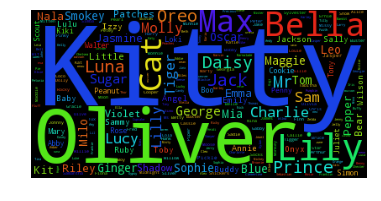

In [170]:
plt.imshow(word_cloud)
plt.axis('off')
plt.figure()
plt.show()

In [171]:
dog_names_str = ''.join(dogs.dropna(subset=['Name']).Name)
dog_names_str = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ,', dog_names_str)

In [172]:
word_cloud.generate(dog_names_str)
word_cloud.to_file(path.join('dog_names.png'))

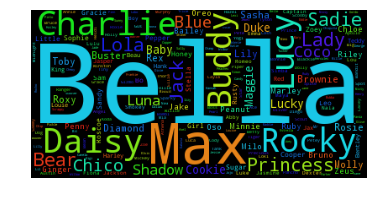

In [173]:
plt.imshow(word_cloud)
plt.axis('off')
plt.figure()
plt.show()